# HW#7: K-fold Cross-Validation

- 내용: K-fold Cross-validation를 이용해서 적절한 모델 선정하기 (K=5)
- 교차검증모델: Hidden layer 갯수가 1, 2, 3, 4인 4개의 뉴럴네트워크 모델. Hidden layer의 유닛수는 6로 고정
- 데이터: sinusoidal + 노이즈 데이터
- 결과: K-fold cross-validation를 통해서 선정된 모델

## Sample Neural Network Model 
 - Regression problem

In [3]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn

In [10]:
x = np.loadtxt('./noisy_sin_sample.csv',delimiter=',',dtype="float32")

np.random.shuffle(x) # shuffling

d_in = x[:,0]
d_out = x[:,1]
in_data = np.split(d_in, [4,8,12,16,21])       # 5-fold split
out_data = np.split(d_out, [4,8,12,16,21])      # 5-fold split

In [11]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()   # 모든 gradient를 0으로 초기화
        loss_train.backward()   # gradient 계산
        optimizer.step()        # 최적화 

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [34]:
# Model 생성

# Model_1: 1 layer
seq_model1 = nn.Sequential(
            nn.Linear(1, 6), # <1>
            nn.Tanh(),
            nn.Linear(6, 1)) # <2>

# Model_2: 2 layer
seq_model2 = nn.Sequential(
            nn.Linear(1, 6), # <1>
            nn.Tanh(),
            nn.Linear(6, 6), # <1>
            nn.Tanh(),      
            nn.Linear(6, 1)) # <2>

# Model_3: 3 layer
seq_model3 = nn.Sequential(
            nn.Linear(1, 6), # <1>
            nn.Tanh(),
            nn.Linear(6, 6), # <1>
            nn.Tanh(),    
            nn.Linear(6, 6), # <1>
            nn.Tanh(),      
            nn.Linear(6, 1)) # <2>

# Model_4: 4 layer
seq_model4 = nn.Sequential(
            nn.Linear(1, 6), # <1>
            nn.Tanh(),
            nn.Linear(6, 6), # <1>
            nn.Tanh(),
            nn.Linear(6, 6), # <1>
            nn.Tanh(),        
            nn.Linear(6, 6), # <1>
            nn.Tanh(),      
            nn.Linear(6, 1)) # <2>

## Parameters
- 자유롭게 선정
- lr = 0.1 fixed
- max iteration = 30000 fixed

In [54]:
# 실행할 때마다 model과 fold_set = 0,1,2,3,4 를 설정해줘야 함.
optimizer = optim.SGD(seq_model4.parameters(), lr=1e-1) # 주의: lr에 매우 민감. 여러 값 시도해 보도록

#fold_set = 4 # 매번 바꾸면서 수행. Fold = 0,1,2,3,4

# K-fold 구성
yy = np.zeros(shape=(1,),dtype="float32")
zz = np.zeros(shape=(1,),dtype="float32")
for n in range(5):
    if  n != fold_set:
        yy = np.concatenate((yy,in_data[n]), axis=0)
        zz = np.concatenate((zz,out_data[n]), axis=0)
tr_d_in = np.delete(yy,[0])
val_d_in = in_data[fold_set]
tr_d_out = np.delete(zz,[0])
val_d_out = out_data[fold_set]

tr_d_in = torch.tensor(tr_d_in).unsqueeze(1)   # 배치 입력을 위해 차원 추가, 예) 10 --> 10x1
val_d_in = torch.tensor(val_d_in).unsqueeze(1)
tr_d_out = torch.tensor(tr_d_out).unsqueeze(1)   # 배치 입력을 위해 차원 추가, 예) 10 --> 10x1
val_d_out = torch.tensor(val_d_out).unsqueeze(1)

training_loop(
    n_epochs = 30000, 
    optimizer = optimizer,
    model = seq_model4,
    loss_fn = nn.MSELoss(),
    t_u_train = tr_d_in,

    t_u_val = val_d_in, 
    t_c_train = tr_d_out,
    t_c_val = val_d_out)
    
print('output', seq_model1(val_d_in))
print('answer', val_d_out)
#print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 0.0630, Validation loss 0.0414
Epoch 1000, Training loss 0.0279, Validation loss 0.0656
Epoch 2000, Training loss 0.0277, Validation loss 0.0669
Epoch 3000, Training loss 0.0275, Validation loss 0.0680
Epoch 4000, Training loss 0.0273, Validation loss 0.0689
Epoch 5000, Training loss 0.0271, Validation loss 0.0696
Epoch 6000, Training loss 0.0270, Validation loss 0.0701
Epoch 7000, Training loss 0.0269, Validation loss 0.0705
Epoch 8000, Training loss 0.0267, Validation loss 0.0708
Epoch 9000, Training loss 0.0266, Validation loss 0.0710
Epoch 10000, Training loss 0.0265, Validation loss 0.0711
Epoch 11000, Training loss 0.0264, Validation loss 0.0712
Epoch 12000, Training loss 0.0263, Validation loss 0.0713
Epoch 13000, Training loss 0.0262, Validation loss 0.0713
Epoch 14000, Training loss 0.0261, Validation loss 0.0713
Epoch 15000, Training loss 0.0260, Validation loss 0.0713
Epoch 16000, Training loss 0.0259, Validation loss 0.0713
Epoch 17000, Training loss 

## Validation error vs Models
- 다음 테이블을 채우시오

| Fold | model_1  | model_2  | model_3  | model_4  |
|------|----------|----------|----------|----------|
|  0   |  0.0878  |  0.0801  |  0.0834  |  0.0843  |
|  1   |  0.0160  |  0.0102  |  0.0726  |  0.0272  |
|  2   |  0.0264  |  0.0350  |  0.0681  |  0.0406  |
|  3   |  0.1190  |  0.1043  |  0.0529  |  0.0445  |
|  4   |  0.0656  |  0.0831  |  0.1476  |  0.0466  |
|------|----------|----------|----------|----------|
| Avg  |  0.06296 |  0.06254 |  0.08492 |  0.04864 |

- 최저 평균 validation error를 갖는 모델은?  => model_4

## 최종 모델에 대한 full dataset에 대해서 training

In [64]:
x = np.loadtxt('./noisy_sin_sample.csv',delimiter=',',dtype="float32")

np.random.shuffle(x) # shuffling

d_in = x[:,0]
d_out = x[:,1]
d_in = torch.tensor(d_in).unsqueeze(1)   # 배치 입력을 위해 차원 추가, 예) 10 --> 10x1
d_out = torch.tensor(d_out).unsqueeze(1)   # 배치 입력을 위해 차원 추가, 예) 10 --> 10x1

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_c_train):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)
        
        optimizer.zero_grad()   # 모든 gradient를 0으로 초기화
        loss_train.backward()   # gradient 계산
        optimizer.step()        # 최적화 

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f"")

# Model_4: 4 layer
seq_model4 = nn.Sequential(
            nn.Linear(1, 6), # <1>
            nn.Tanh(),
            nn.Linear(6, 6), # <1>
            nn.Tanh(),
            nn.Linear(6, 6), # <1>
            nn.Tanh(),        
            nn.Linear(6, 6), # <1>
            nn.Tanh(),      
            nn.Linear(6, 1)) # <2>

optimizer = optim.SGD(seq_model4.parameters(), lr=1e-1)

training_loop(
    n_epochs = 30000, 
    optimizer = optimizer,
    model = seq_model4,
    loss_fn = nn.MSELoss(),
    t_u_train = d_in,
    t_c_train = d_out)
    
print('output', seq_model4(d_in))
print('answer', d_out)
#print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 0.6108,
Epoch 1000, Training loss 0.0513,
Epoch 2000, Training loss 0.0533,
Epoch 3000, Training loss 0.0499,
Epoch 4000, Training loss 0.0496,
Epoch 5000, Training loss 0.0494,
Epoch 6000, Training loss 0.0485,
Epoch 7000, Training loss 0.0466,
Epoch 8000, Training loss 0.0415,
Epoch 9000, Training loss 0.0347,
Epoch 10000, Training loss 0.0320,
Epoch 11000, Training loss 0.0316,
Epoch 12000, Training loss 0.0315,
Epoch 13000, Training loss 0.0313,
Epoch 14000, Training loss 0.0311,
Epoch 15000, Training loss 0.0309,
Epoch 16000, Training loss 0.0307,
Epoch 17000, Training loss 0.0306,
Epoch 18000, Training loss 0.0305,
Epoch 19000, Training loss 0.0304,
Epoch 20000, Training loss 0.0303,
Epoch 21000, Training loss 0.0302,
Epoch 22000, Training loss 0.0301,
Epoch 23000, Training loss 0.0298,
Epoch 24000, Training loss 0.0292,
Epoch 25000, Training loss 0.0271,
Epoch 26000, Training loss 0.0237,
Epoch 27000, Training loss 0.0223,
Epoch 28000, Training loss 0.0219

## 최종모델 (regression)에 대한 시각화

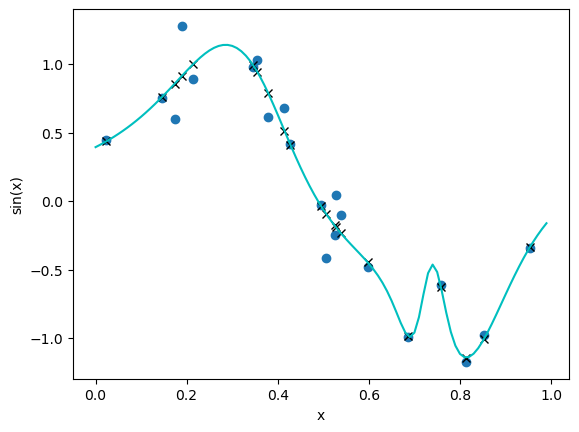

In [72]:
from matplotlib import pyplot as plt

t_range = torch.arange(0.0, 1.0,0.01).unsqueeze(1)

fig = plt.figure(dpi=100)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.plot(d_in.numpy(), d_out.numpy(), 'o')
plt.plot(d_in.numpy(), seq_model4(d_in).detach().numpy(), 'kx')
plt.plot(t_range.numpy(), seq_model4(t_range).detach().numpy(), 'c-')